In [5]:
!pip install tensorflow


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

Found 2667 files belonging to 33 classes.
Found 667 files belonging to 33 classes.
Found 660 files belonging to 33 classes.
Classes found: ['Anthomastus Like coral', 'Arborescent Stumpy Grey Branching Erect sponges', 'Arborescent coral', 'Attached Stony coral', 'Bioturbation - Organism tests', 'Bony fishes', 'Colonial Unstalked Ascidian', 'Crab', 'Ctenophores jellies', 'Cup-likes sponges', 'Eels', 'Feather stars', 'Free-living coral', 'General unknown biology', 'Hermit Crab with Shell or Stone', 'Irregular urchins', 'Laminar Erect sponges', 'Octopods', 'Other anemones', 'Prawns - Shrimps - Mysids', 'Quill (Sea pen) coral', 'Sea Cucumber', 'Sea stars', 'Sea urchins', 'Sea whip coral', 'Simple Branching coral', 'Snake stars', 'Squat lobsters', 'Stalked Erect sponges', 'True lobsters', 'Tube anemones', 'Tube worms', 'Woody debris']
Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32,

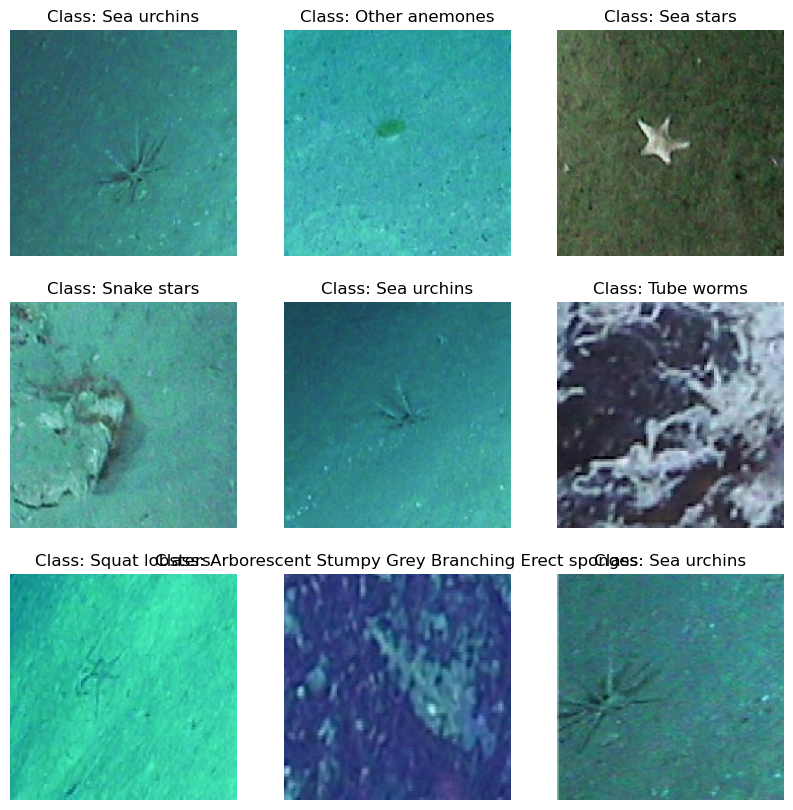

In [3]:
dataset_path = "C:\\Users\\Mohit\\Downloads\\Deepdive"

batch_size = 32
image_size = (224, 224)

train_dataset = image_dataset_from_directory(
    directory=f"{dataset_path}/train",
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123
)

validation_dataset = image_dataset_from_directory(
    directory=f"{dataset_path}/validation",
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123
)

test_dataset = image_dataset_from_directory(
    directory=f"{dataset_path}/test",
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False
)

class_names = train_dataset.class_names
print(f"Classes found: {class_names}")

print("Training Dataset:", train_dataset)
print("Validation Dataset:", validation_dataset)
print("Test Dataset:", test_dataset)

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class: {class_names[labels[i]]}")
        plt.axis("off")

plt.show()

In [4]:
# Normalize pixel values to the range [0, 1]
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(normalize_image)
validation_dataset = validation_dataset.map(normalize_image)
test_dataset = test_dataset.map(normalize_image)


In [5]:
# Apply data augmentation to the training dataset
from tensorflow.keras.layers import RandomFlip, RandomRotation

augmentation_layer = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1)
])

def augment_image(image, label):
    image = augmentation_layer(image)
    return image, label

train_dataset = train_dataset.map(augment_image)

In [6]:
# Prefetch data for better performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

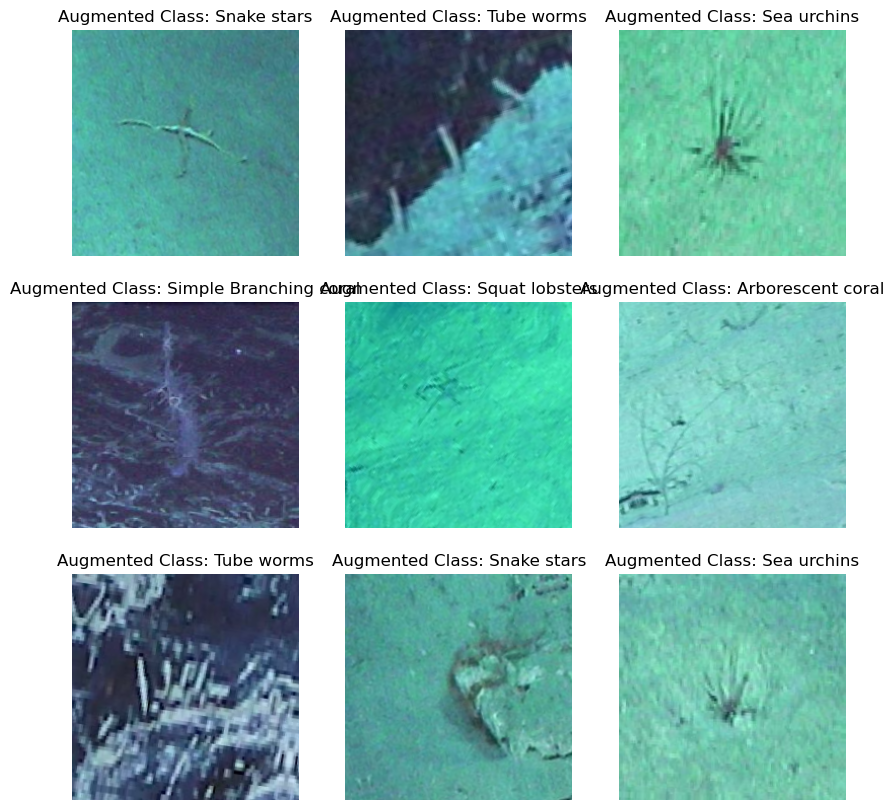

Data preprocessing complete.


In [7]:
# Display some augmented images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Augmented Class: {class_names[labels[i]]}")
        plt.axis("off")

plt.show()

print("Data preprocessing complete.")